# Mapa de sitios Web de Costa Rica

En esta libreta se toma una lista de sitios web, se analiza con herramientas de SSLLabs para encontrar propiedades de certificados de TLS para HTTPS, y luego los grafica agrupando según el nombre del sitio.

Se migra a NetworkX para facilidad de uso, con zoom y tooltips sencillos de manejar.

## Pasos

1. Recopilar lista de sitios web y anotar en archivo TXT
2. Usar herramienta ``ssllabs-scan`` para recorrer la lista y guardar resultado archivo JSON
3. Iniciar el procesamiento del archivo JSON para importarlos como nodos/enlaces/propiedades
4. Graficado de la información


### Ejecución de ``ssllabs-scan``

In [125]:
! ssllabs-scan -usecache -maxage 192 -hostfile data/mini-sitios.txt -quiet > data/ssllabs-$(date +%F).json

In [126]:
import json
import datetime
from pprint import pprint

json_data = json.load(open('data/ssllabs-' +  str(datetime.date.today()) + '.json'))

In [ ]:
# Este bloque me sirve para entender la estructura del archivo JSON generado

for domain in json_data:
    if "fi.cr" in domain['host']:
        print('Financiero')
    elif "go.cr" in domain['host']:
        print('Gobierno')
    elif ("co.cr" in domain['host']) or ("com" in domain['host']):
        print('Comercial')
    else:
        print('No hay categoria de dominio')
    print('\tName: ' + domain['host'])
    for endpoint in domain['endpoints']:
        if 'serverName' in endpoint:
            print('\t\tEndpoint: ' + endpoint['serverName'])
        else:
            print('\t\tEndpoint: ' + endpoint['ipAddress'])
        if 'grade' in endpoint:
            print('\t\t\tGrade: ' + endpoint['grade'])
        else:
            print('\t\t\tGrade: F\n\t\t\tError: ' + endpoint['statusMessage'])


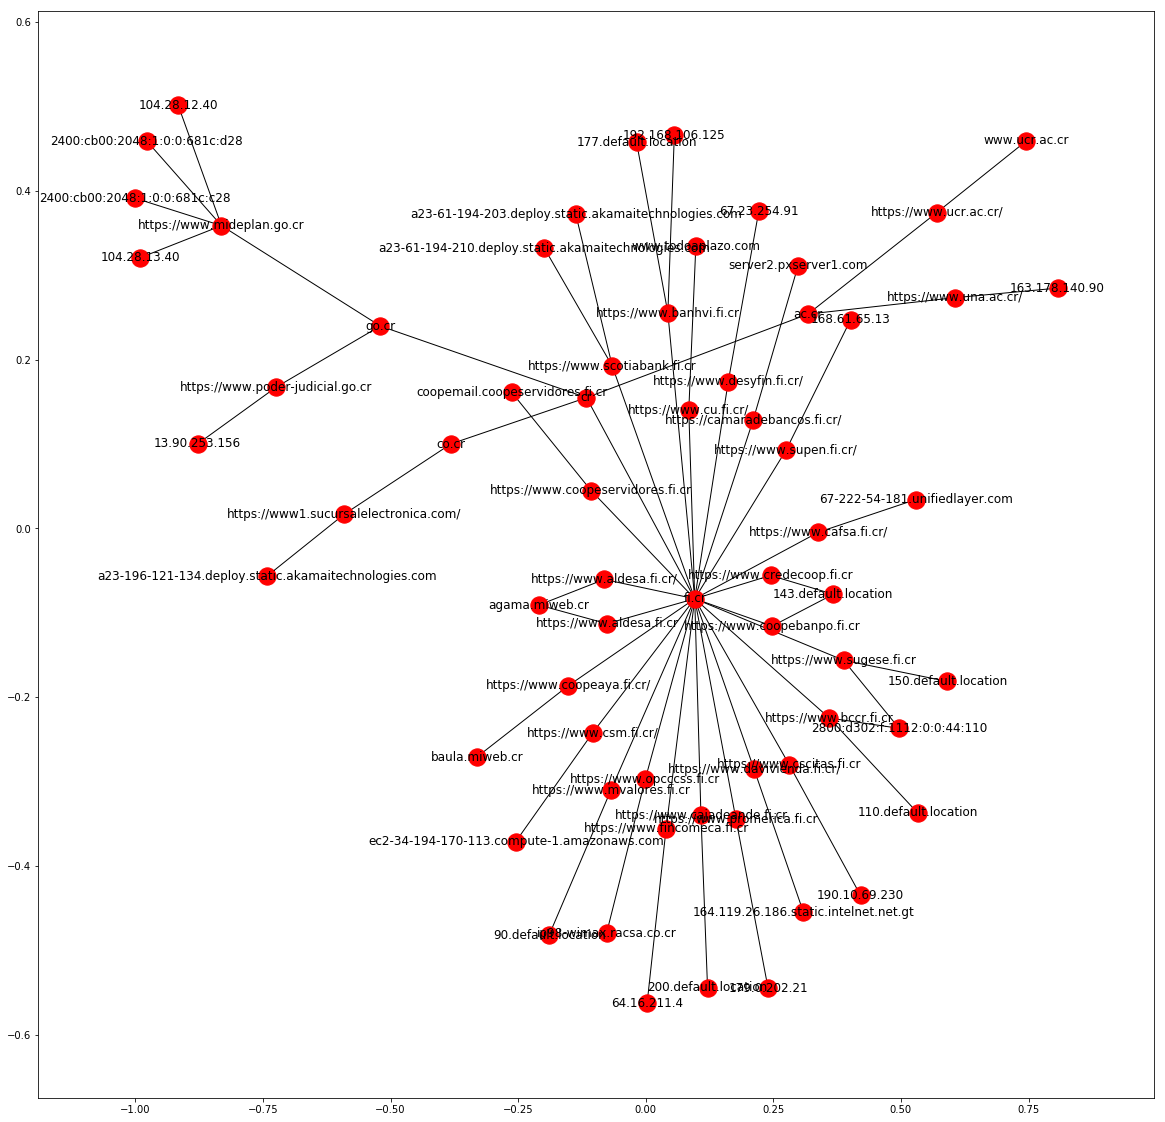

In [127]:
# Siguiendo tutorial https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html
import networkx as nx

plt.figure(figsize=(20,20))
costaRica=nx.Graph()

costaRica.add_node('cr', label="Costa Rica", node_color='black')
costaRica.add_node('fi.cr', label="Financiero")
costaRica.add_edge('cr','fi.cr')
costaRica.add_node('co.cr', label="Comercial")
costaRica.add_edge('cr','co.cr')
costaRica.add_node('go.cr', label="Gobierno")
costaRica.add_edge('cr','go.cr')
costaRica.add_node('ac.cr', label="Académico")
costaRica.add_edge('cr','ac.cr')

for domain in json_data:
    costaRica.add_node(domain['host'], label=domain['host'], color='blue')
    if "fi.cr" in domain['host']:
        costaRica.add_edge('fi.cr', domain['host'])
    elif "go.cr" in domain['host']:
        costaRica.add_edge('go.cr', domain['host'])
    elif ("co.cr" in domain['host']) or ("com" in domain['host']):
        costaRica.add_edge('co.cr', domain['host'])
    elif ("ac.cr" in domain['host']) or ("com" in domain['host']):
        costaRica.add_edge('ac.cr', domain['host'])
    else:
        print('No hay categoria de dominio')
    for endpoint in domain['endpoints']:
        if 'serverName' in endpoint:
            costaRica.add_node(endpoint['serverName'], label=endpoint['serverName'])
            costaRica.add_edge(endpoint['serverName'],domain['host'])
        else:
            costaRica.add_node(endpoint['ipAddress'], label=endpoint['ipAddress'])
            costaRica.add_edge(endpoint['ipAddress'],domain['host'])
        if 'grade' in endpoint:
            costaRica.node[domain['host']]['grade'] = endpoint['grade']
            costaRica.node[domain['host']]['node_color'] = 'green'
        else:
            costaRica.node[domain['host']]['grade'] = 'F'
            costaRica.node[domain['host']]['statusMessage'] = endpoint['statusMessage']


import matplotlib.pyplot as plt
nx.draw_networkx(costaRica,with_labels=True)
plt.show(costaRica)